# NOTA:
## Los comentarios sobre graficos y modelos se realizron en el informe.

In [21]:
# MANIPULACION DE DATOS
import pandas as pd
import numpy as np

# ESCALAR DATOS
from sklearn.preprocessing import StandardScaler, LabelEncoder

# BALANCE DE DATOS
from sklearn.utils.class_weight import compute_class_weight

# GRAFICOS
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage

# METRICAS
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report, roc_curve, auc

# HIPERPARAMETROS
from sklearn.model_selection import  GridSearchCV

# SPLIT y PIPELINE
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

# MODELOS #
# SVM
from sklearn.svm import SVC

# Random forest
from sklearn.ensemble import RandomForestClassifier

# Analisis descriptivo de los datos

In [22]:
df = pd.read_csv("/content/CoffeeRatings.csv", delimiter =  ';')

In [23]:
df.head()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green


In [ ]:
df.describe()

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,623.726946,615.576048,611.677844,617.116168,610.330539,611.276647,191.758084,157.644311,8.231138,6675.440719
std,273.720152,274.245606,263.865747,274.480062,276.366482,276.300203,257.583828,203.439529,5.130245,3007.519639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,717.000000,708.000000,683.000000,717.000000,708.000000,692.000000,100.000000,100.000000,1.000000,7792.000000
50%,758.000000,742.000000,733.000000,742.000000,742.000000,742.000000,100.000000,100.000000,11.000000,8183.000000
75%,775.000000,767.000000,758.000000,767.000000,767.000000,767.000000,100.000000,100.000000,12.000000,8325.000000
max,875.000000,883.000000,867.000000,875.000000,842.000000,858.000000,933.000000,933.000000,17.000000,9058.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [ ]:
df.columns
columnas= ['Scores_Body', 'Scores_Balance', 'Scores_Uniformity',
       'Scores_Sweetness', 'Scores_Moisture', 'Scores_Total']

c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWar

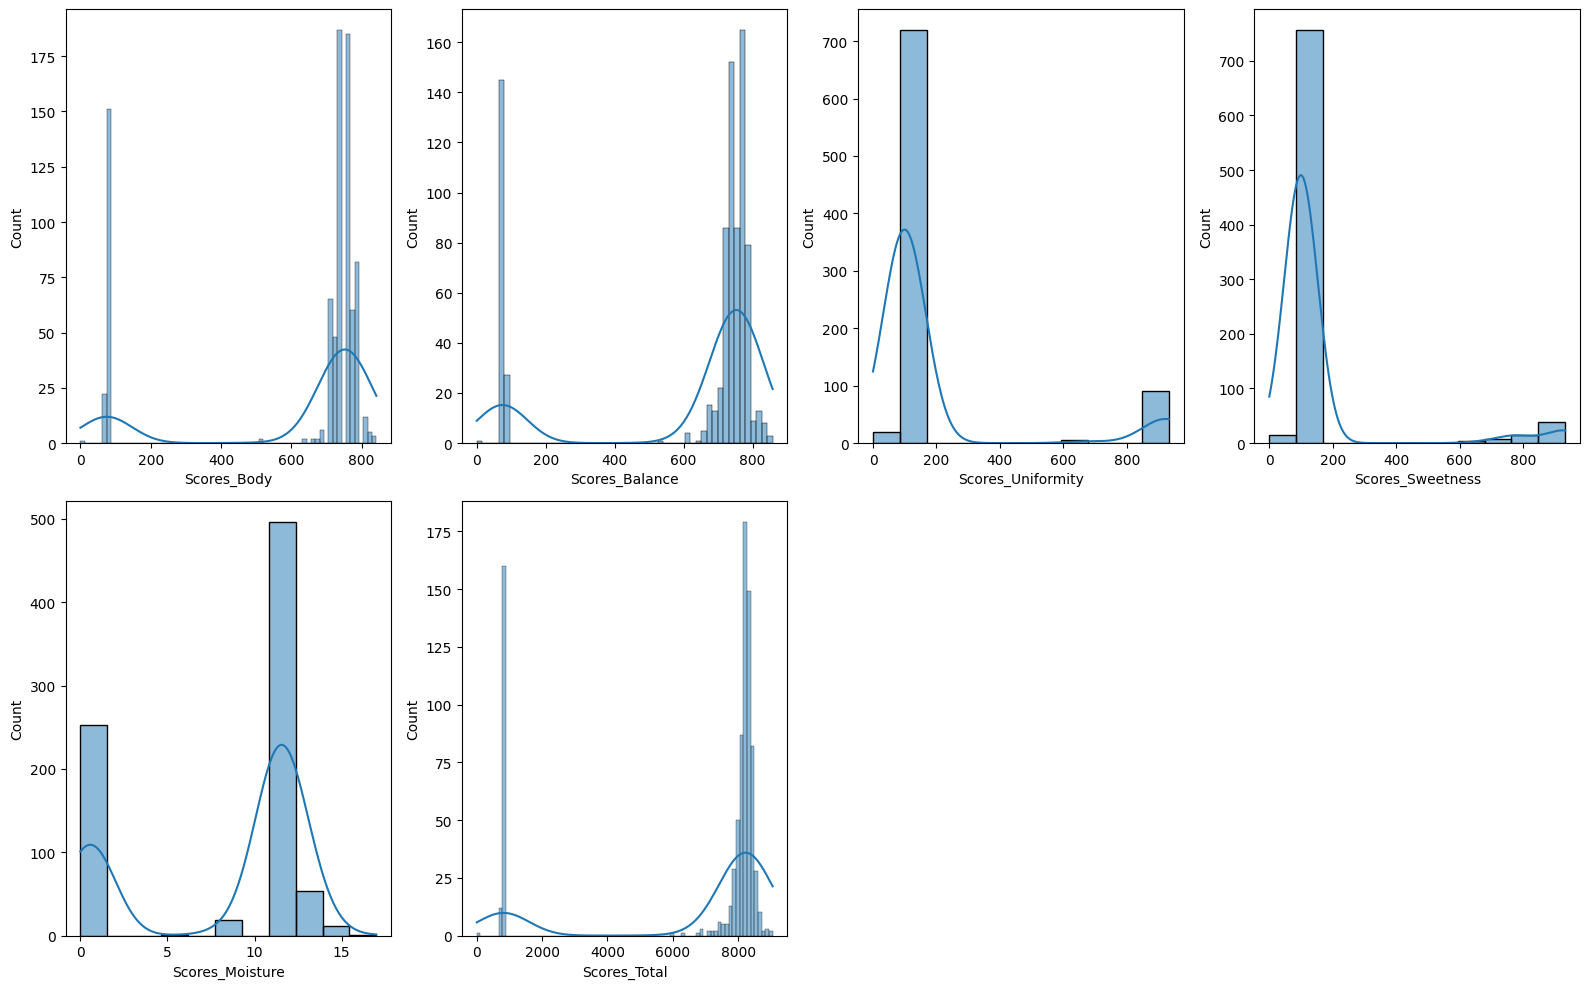

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de histogramas para cada variable numérica
for i, column in enumerate(columnas):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=column, data=df, kde=True)  # Puedes ajustar kde a False si no quieres la estimación de densidad kernel.

# Ajustes de diseño
plt.tight_layout()
plt.show()

c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

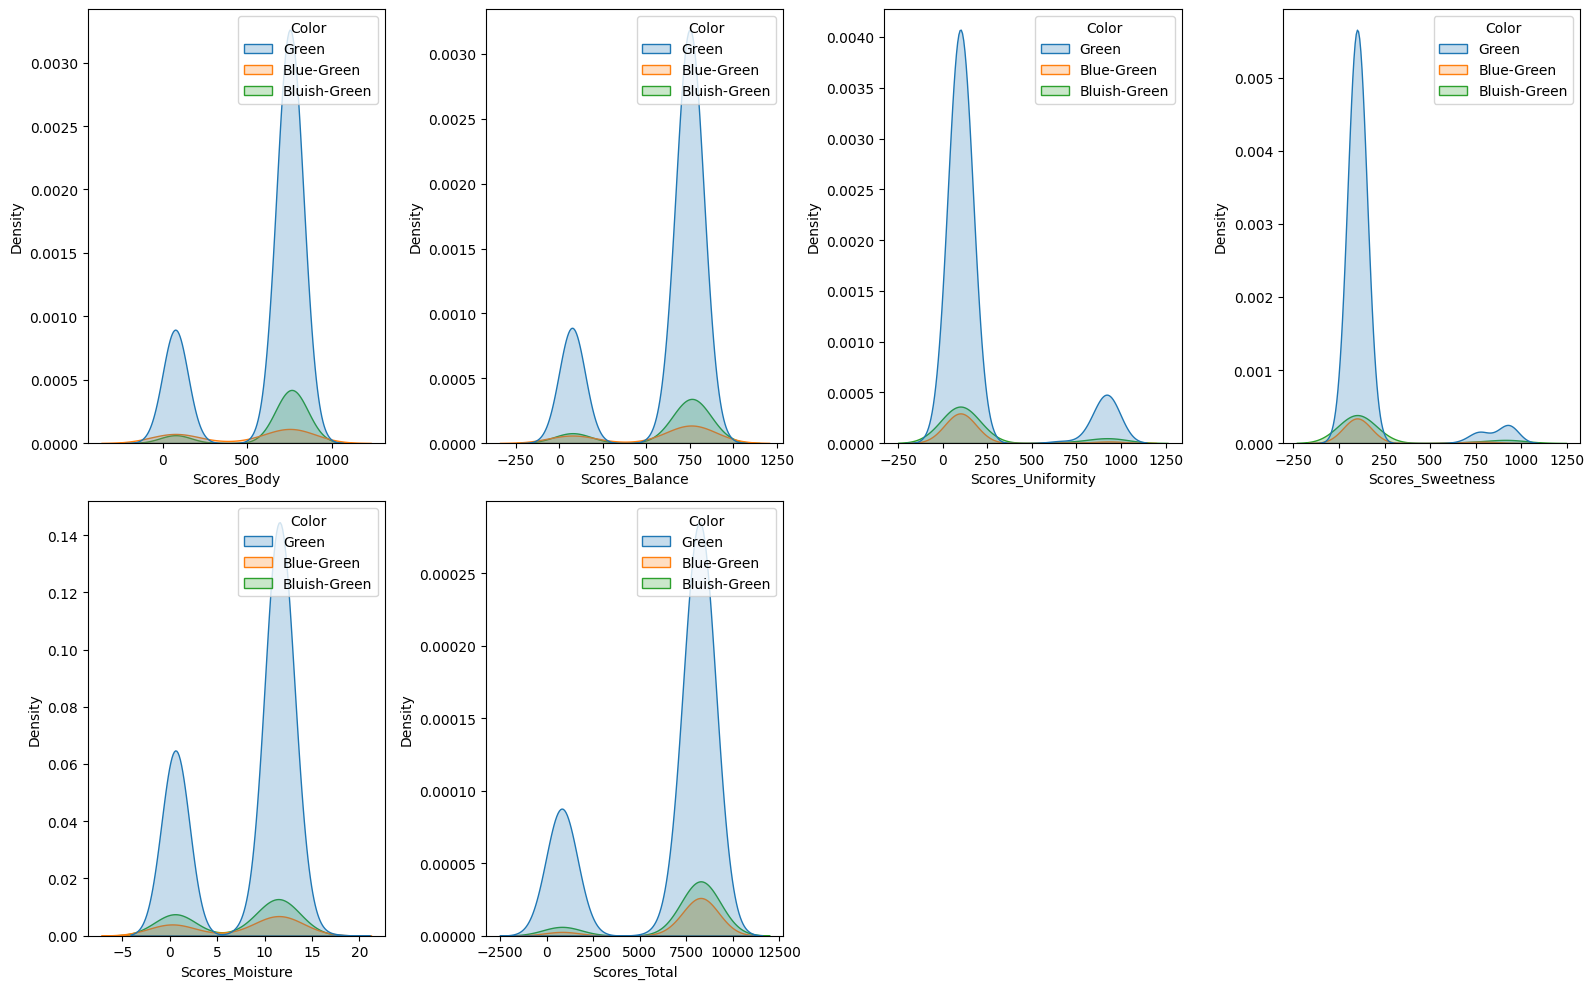

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de densidad para cada variable numérica
for i, column in enumerate(columnas):
    plt.subplot(2, 4, i+1)

    # Utilizar seaborn para crear gráficos de densidad con colores según la columna "Color"
    sns.kdeplot(x=column, data=df, hue='Color', fill=True)

# Ajustes de diseño
plt.tight_layout()
plt.show()

c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thaiel\Desktop\FCEIA\mineria de datos\practicas\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

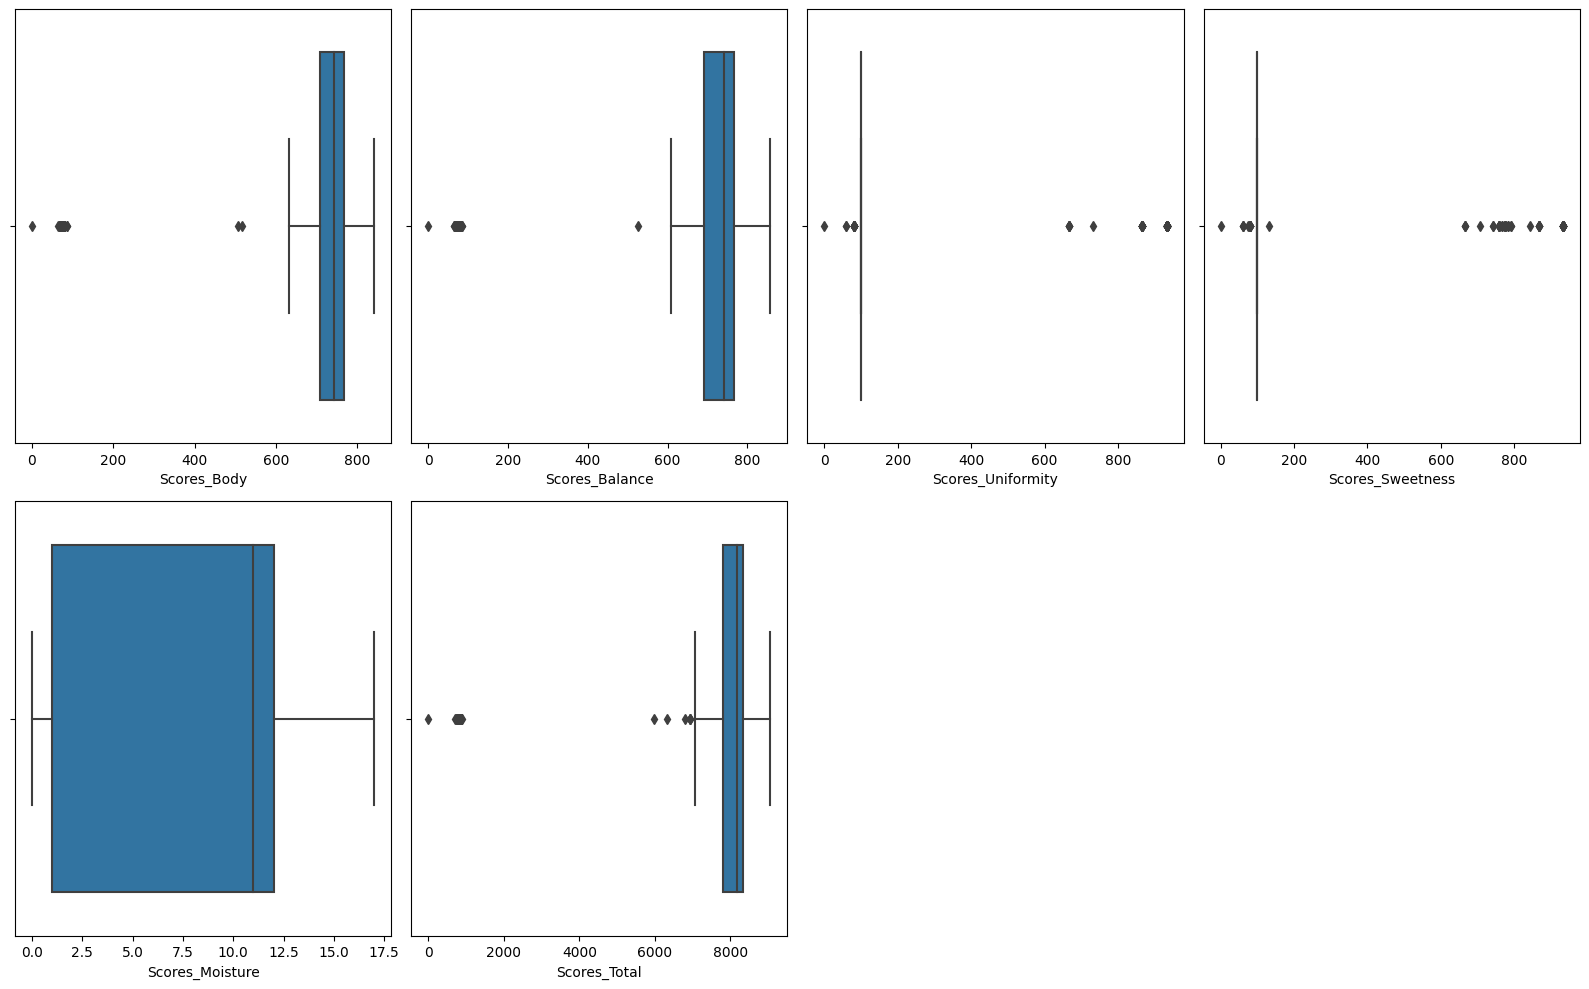

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de boxplots para cada variable numérica
for i, column in enumerate(columnas):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=column, data=df)

# Ajustes de diseño
plt.tight_layout()
plt.show()

# División  de datos

In [87]:
# Separacion de variables X e Y
data = df.copy()
x = data.drop("Color", axis = 1)
y = data['Color']

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# SVM


## KERNEL LINEAL
## **Sin balance**

In [84]:
# Definición del modelo con kernel lineal
svm_classifier_linear = SVC(kernel='linear')

# Definir los parámetros a ajustar (sin 'gamma')
param_grid = {'C': [0.1, 1, 3, 5]}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_classifier_linear, param_grid, cv=5, scoring='balanced_accuracy')

# Realizar la búsqueda en cuadrícula para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores parámetros
best_svm_classifier_linear = grid_search.best_estimator_

# Predicciones con validación cruzada
y_pred_SVML = best_svm_classifier_linear.predict(X_test)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Imprimir los resultados de la búsqueda en cuadrícula
print("GridSearchCV Results (linear):")
results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean: {mean}, Std: {std}, Params: {params}")

# Imprimir la mejor puntuación alcanzada durante la búsqueda
print("Best Score:", grid_search.best_score_)

Mejores hiperparámetros: {'C': 3}
GridSearchCV Results (linear):
Mean: 0.33271604938271604, Std: 0.0012345679012345735, Params: {'C': 0.1}
Mean: 0.34106870889581165, Std: 0.013992812678081197, Params: {'C': 1}
Mean: 0.34882139148494284, Std: 0.019343139780746987, Params: {'C': 3}
Mean: 0.3313156224760586, Std: 0.007433178778797731, Params: {'C': 5}
Best Score: 0.34882139148494284


Informe de Clasificación después de la Validación Cruzada:
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00         7
Bluish-Green       0.00      0.00      0.00        17
       Green       0.85      0.96      0.90       143

    accuracy                           0.82       167
   macro avg       0.28      0.32      0.30       167
weighted avg       0.73      0.82      0.77       167



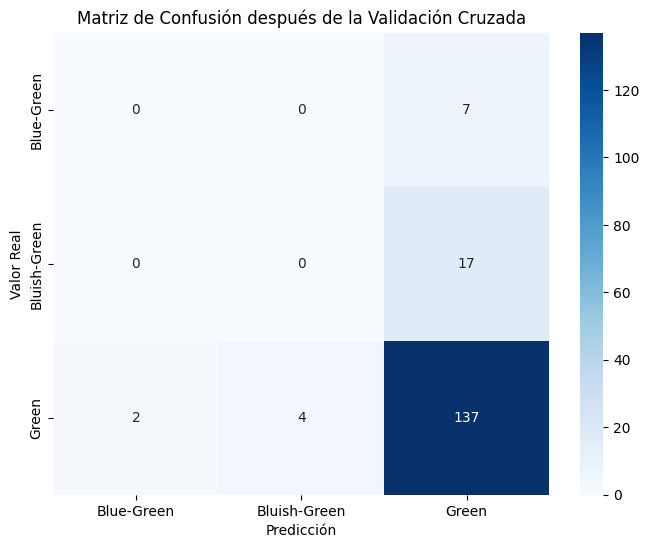

In [85]:
# Obtener el informe de clasificación
report_cv = classification_report(y_test, y_pred_SVML)
print('Informe de Clasificación después de la Validación Cruzada:')
print(report_cv)

# Matriz de confusión
conf_matrix_cv = confusion_matrix(y_test, y_pred_SVML)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

## **Con balance**

In [88]:
# Calcular los pesos de clase para manejar el desbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Crear un diccionario de pesos de clase para usar en el modelo
class_weight_dict = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}

# Definir el modelo con kernel lineal, configuración para DAGSVM y asignación de pesos de clase
svm_classifier_linear = SVC(kernel='linear', decision_function_shape='ovr', class_weight=class_weight_dict)


# Definir los parámetros a ajustar (sin 'gamma')
param_grid = {'C': [0.1, 1, 3, 5]}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_classifier_linear, param_grid, cv=5, scoring='recall_macro')

# Realizar la búsqueda en cuadrícula para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores parámetros
best_svm_classifier_linear = grid_search.best_estimator_

# Predicciones con validación cruzada
y_pred_SVML = best_svm_classifier_linear.predict(X_test)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Imprimir los resultados de la búsqueda en cuadrícula
print("GridSearchCV Results (linear):")
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print(f"Mean: {mean}, Std: {std}, Params: {params}")

# Imprimir la mejor puntuación alcanzada durante la búsqueda
print("Best Score:", grid_search.best_score_)

Mejores hiperparámetros: {'C': 0.1}
GridSearchCV Results (linear):
Mean: 0.43420975067392514, Std: 0.05932712141192986, Params: {'C': 0.1}
Mean: 0.4046519714276723, Std: 0.0461321592333298, Params: {'C': 1}
Mean: 0.4196903353367528, Std: 0.04676750649947631, Params: {'C': 3}
Mean: 0.40904218718860463, Std: 0.040940715710740115, Params: {'C': 5}
Best Score: 0.43420975067392514


Informe de Clasificación después de la Validación Cruzada:
              precision    recall  f1-score   support

  Blue-Green       0.10      0.71      0.17         7
Bluish-Green       0.09      0.41      0.14        17
       Green       0.83      0.20      0.33       143

    accuracy                           0.25       167
   macro avg       0.34      0.44      0.21       167
weighted avg       0.72      0.25      0.30       167



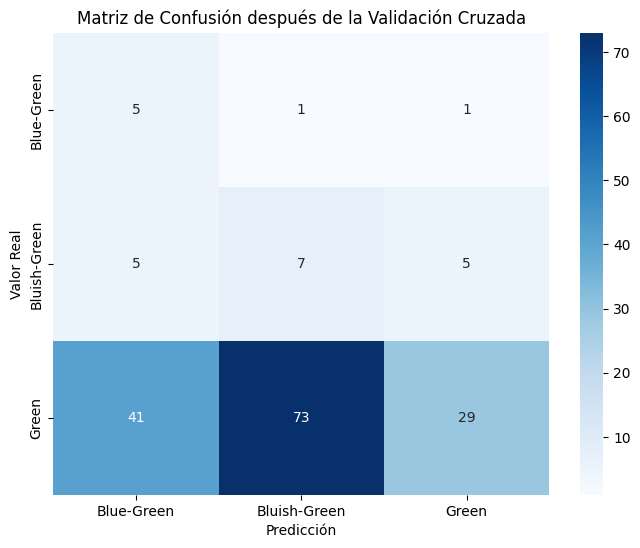

In [89]:
# Obtener el informe de clasificación
report_cv = classification_report(y_test, y_pred_SVML)
print('Informe de Clasificación después de la Validación Cruzada:')
print(report_cv)

# Matriz de confusión
conf_matrix_cv = confusion_matrix(y_test, y_pred_SVML)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

## KERNEL GAUSSIANO


# **Sin balance**

In [90]:
# Definición del modelo con kernel gaussiano (RBF)
svm_classifier_rbf = SVC(kernel='rbf')

# Definir los parámetros a ajustar
param_grid = {'C': [0.1, 1, 3, 10],
             'gamma': [0.01, 0.1, 1, 10]}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_classifier_rbf, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en cuadrícula para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores parámetros
best_svm_classifier_rbf = grid_search.best_estimator_

# Predicciones
y_pred_rbf = best_svm_classifier_rbf.predict(X_test)

# Imprimir los resultados de la búsqueda en cuadrícula
print("GridSearchCV Results (rbf):")
results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean: {mean}, Std: {std}, Params: {params}")

# Imprimir la mejor puntuación alcanzada durante la búsqueda
print("Best Score:", grid_search.best_score_)

GridSearchCV Results (rbf):
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 0.1, 'gamma': 0.01}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 0.1, 'gamma': 0.1}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 0.1, 'gamma': 1}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 0.1, 'gamma': 10}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 1, 'gamma': 0.01}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 1, 'gamma': 0.1}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 1, 'gamma': 1}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 1, 'gamma': 10}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 3, 'gamma': 0.01}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 3, 'gamma': 0.1}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 3, 'gamma': 1}
Mean: 0.8053866008304343, Std: 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Informe de Clasificación después de la Validación Cruzada:
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00         7
Bluish-Green       0.00      0.00      0.00        17
       Green       0.86      1.00      0.92       143

    accuracy                           0.86       167
   macro avg       0.29      0.33      0.31       167
weighted avg       0.73      0.86      0.79       167



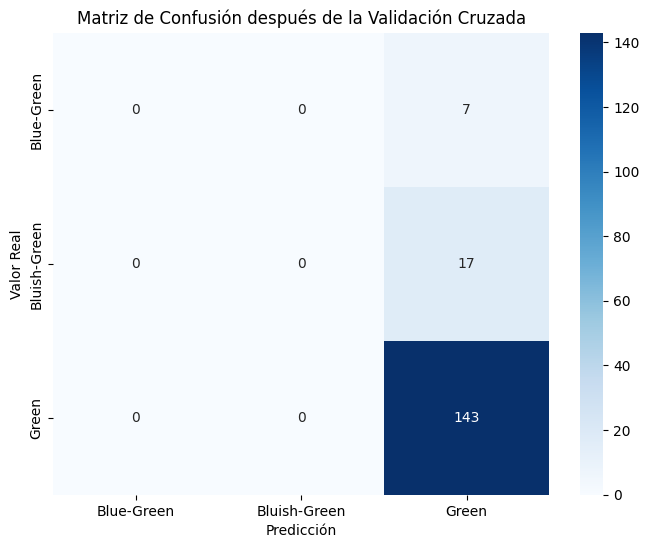

In [91]:
# Informe de Clasificación después de la Validación Cruzada
report_cv = classification_report(y_test, y_pred_rbf)
print('Informe de Clasificación después de la Validación Cruzada:')
print(report_cv)

# Matriz de Confusión después de la Validación Cruzada
conf_matrix_cv = confusion_matrix(y_test, y_pred_rbf)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

## **Con balance**

In [92]:
# Calcular los pesos de clase para manejar el desbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Crear un diccionario de pesos de clase para usar en el modelo
class_weight_dict = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}

# Definición del modelo con kernel gaussiano (RBF), configuración para DAGSVM y asignación de pesos de clase
svm_classifier_rbf = SVC(kernel='rbf', decision_function_shape='ovr', class_weight=class_weight_dict)

# Definir los parámetros a ajustar
param_grid = {'C': [0.1, 1, 3, 10],
             'gamma': [0.01, 0.1, 1, 10]}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(svm_classifier_rbf, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en cuadrícula para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores parámetros
best_svm_classifier_rbf = grid_search.best_estimator_

# Predicciones
y_pred_rbf = best_svm_classifier_rbf.predict(X_test)

# Imprimir los resultados de la búsqueda en cuadrícula
print("GridSearchCV Results (rbf):")
results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean: {mean}, Std: {std}, Params: {params}")

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Imprimir la mejor puntuación alcanzada durante la búsqueda
print("Best Score:", grid_search.best_score_)

GridSearchCV Results (rbf):
Mean: 0.08231399394007406, Std: 0.014815277526138456, Params: {'C': 0.1, 'gamma': 0.01}
Mean: 0.08231399394007406, Std: 0.014815277526138456, Params: {'C': 0.1, 'gamma': 0.1}
Mean: 0.08231399394007406, Std: 0.014815277526138456, Params: {'C': 0.1, 'gamma': 1}
Mean: 0.08231399394007406, Std: 0.014815277526138456, Params: {'C': 0.1, 'gamma': 10}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 1, 'gamma': 0.01}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 1, 'gamma': 0.1}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 1, 'gamma': 1}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 1, 'gamma': 10}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 3, 'gamma': 0.01}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 3, 'gamma': 0.1}
Mean: 0.8053866008304343, Std: 0.0007146979386417005, Params: {'C': 3, 'gamma': 1}
Mean: 0.8053866008304343, Std: 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Informe de Clasificación después de la Validación Cruzada:
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00         7
Bluish-Green       0.00      0.00      0.00        17
       Green       0.86      1.00      0.92       143

    accuracy                           0.86       167
   macro avg       0.29      0.33      0.31       167
weighted avg       0.73      0.86      0.79       167



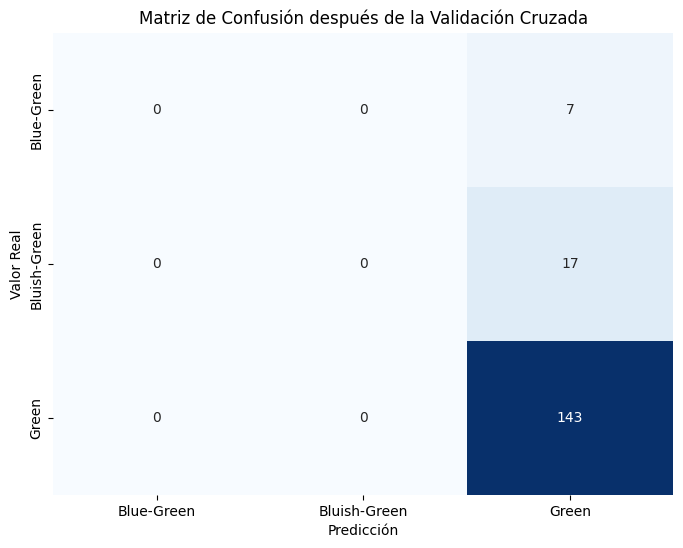

In [93]:
# Informe de Clasificación después de la Validación Cruzada
report_cv = classification_report(y_test, y_pred_rbf)
print('Informe de Clasificación después de la Validación Cruzada:')
print(report_cv)

# Matriz de Confusión después de la Validación Cruzada
conf_matrix_cv = confusion_matrix(y_test, y_pred_rbf)

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

# Random Forest

## Sin balance

In [94]:
# Definición del modelo Random Forest
rf = RandomForestClassifier()

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 150, 200, 500],
    'max_depth': [5, 9, 13, 15],
    'random_state': [18]
}

# Configurar la búsqueda con validación cruzada (k-fold=5)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores parámetros
best_rf_classifier = grid_search.best_estimator_

# Predicciones con validación cruzada
y_pred_cv_rf = best_rf_classifier.predict(X_test)

# Imprimir los resultados de la búsqueda en cuadrícula
print("GridSearchCV Results (RF):")
results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean: {mean}, Std: {std}, Params: {params}")

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Imprimir la mejor puntuación alcanzada durante la búsqueda
print("Best Score:", grid_search.best_score_)

GridSearchCV Results (RF):
Mean: 0.8038940635170014, Std: 0.00277119614598543, Params: {'max_depth': 5, 'n_estimators': 50, 'random_state': 18}
Mean: 0.8053866008304343, Std: 0.004773622258138143, Params: {'max_depth': 5, 'n_estimators': 150, 'random_state': 18}
Mean: 0.8053866008304343, Std: 0.004773622258138143, Params: {'max_depth': 5, 'n_estimators': 200, 'random_state': 18}
Mean: 0.8024015262035686, Std: 0.0032238064072725686, Params: {'max_depth': 5, 'n_estimators': 500, 'random_state': 18}
Mean: 0.8039052856020648, Std: 0.00693252422703447, Params: {'max_depth': 9, 'n_estimators': 50, 'random_state': 18}
Mean: 0.8024015262035686, Std: 0.0032238064072725686, Params: {'max_depth': 9, 'n_estimators': 150, 'random_state': 18}
Mean: 0.8039052856020648, Std: 0.005077717581603636, Params: {'max_depth': 9, 'n_estimators': 200, 'random_state': 18}
Mean: 0.8024015262035686, Std: 0.0032238064072725686, Params: {'max_depth': 9, 'n_estimators': 500, 'random_state': 18}
Mean: 0.80690158231399

Informe de Clasificación después de la Validación Cruzada:
              precision    recall  f1-score   support

  Blue-Green       0.00      0.00      0.00         7
Bluish-Green       0.00      0.00      0.00        17
       Green       0.85      0.99      0.92       143

    accuracy                           0.84       167
   macro avg       0.28      0.33      0.31       167
weighted avg       0.73      0.84      0.78       167



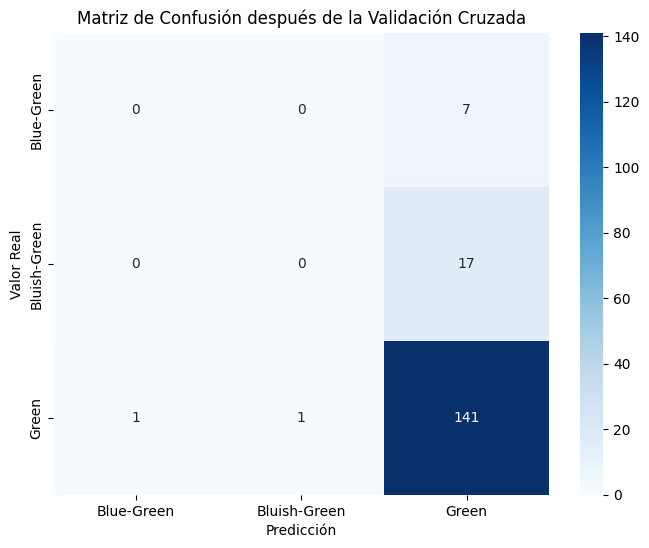

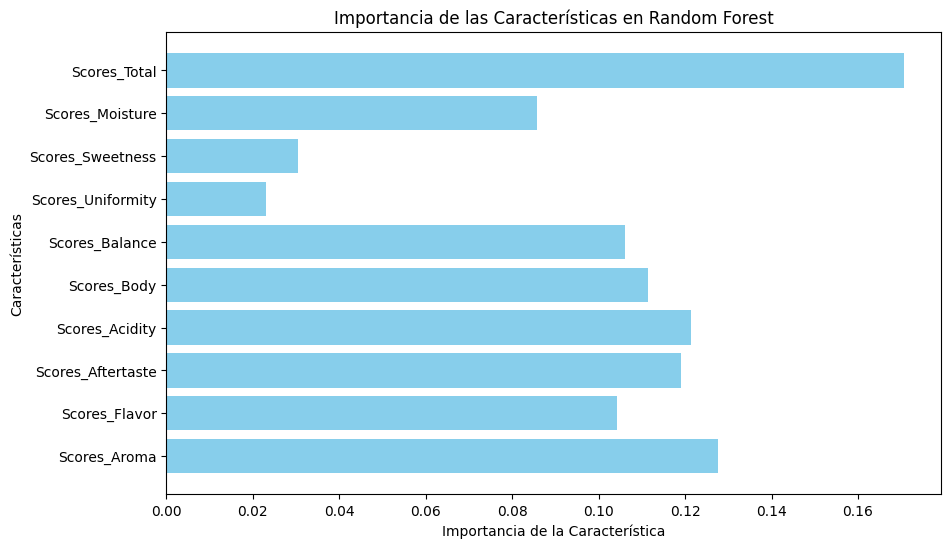

In [95]:
# Obtener el informe de clasificación
report_cv = classification_report(y_test, y_pred_cv_rf)
print('Informe de Clasificación después de la Validación Cruzada:')
print(report_cv)

# Matriz de confusión
conf_matrix_cv = confusion_matrix(y_test, y_pred_cv_rf)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

# Obtener importancia de las características
feature_importances = best_rf_classifier.feature_importances_

# Obtener nombres de las características
feature_names = X_train.columns

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importancia de la Característica')
plt.ylabel('Características')
plt.title('Importancia de las Características en Random Forest')
plt.show()

## Con balance

In [102]:
# Calcular los pesos de clase para manejar el desbalance
class_weights_rf = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Crear un diccionario de pesos de clase para usar en el modelo Random Forest
class_weight_dict_rf = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights_rf)}

# Definición del modelo Random Forest con pesos de clase
rf = RandomForestClassifier(class_weight=class_weight_dict_rf)

# Definir los parámetros a ajustar
param_grid = {
    'n_estimators': [50, 150, 200, 500],
    'max_depth': [5, 9, 13, 15],
    'random_state': [18]
}

# Configurar la búsqueda aleatoria con validación cruzada (k-fold=5)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='recall_macro')

# Realizar la búsqueda aleatoria para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Obtener el modelo con los mejores parámetros
best_rf_classifier = grid_search.best_estimator_

# Predicciones con validación cruzada
y_pred_cv_rf = best_rf_classifier.predict(X_test)

# Imprimir los resultados de la búsqueda en cuadrícula
print("GridSearchCV Results (RF):")
results = grid_search.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print(f"Mean: {mean}, Std: {std}, Params: {params}")

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Imprimir la mejor puntuación alcanzada durante la búsqueda
print("Best Score:", grid_search.best_score_)

GridSearchCV Results (RF):
Mean: 0.4112330994262458, Std: 0.041639596267438655, Params: {'max_depth': 5, 'n_estimators': 50, 'random_state': 18}
Mean: 0.4028862089220345, Std: 0.03301181042156753, Params: {'max_depth': 5, 'n_estimators': 150, 'random_state': 18}
Mean: 0.4089471296558524, Std: 0.02820112717510391, Params: {'max_depth': 5, 'n_estimators': 200, 'random_state': 18}
Mean: 0.39644712965585244, Std: 0.025162588373492892, Params: {'max_depth': 5, 'n_estimators': 500, 'random_state': 18}
Mean: 0.35307690088842736, Std: 0.008911617425239946, Params: {'max_depth': 9, 'n_estimators': 50, 'random_state': 18}
Mean: 0.35235923618322373, Std: 0.015450965327655322, Params: {'max_depth': 9, 'n_estimators': 150, 'random_state': 18}
Mean: 0.35359957309334256, Std: 0.015846106431793794, Params: {'max_depth': 9, 'n_estimators': 200, 'random_state': 18}
Mean: 0.34942713741779163, Std: 0.012877885035849058, Params: {'max_depth': 9, 'n_estimators': 500, 'random_state': 18}
Mean: 0.333778989269

Informe de Clasificación después de la Validación Cruzada:
              precision    recall  f1-score   support

  Blue-Green       0.18      0.43      0.25         7
Bluish-Green       0.16      0.18      0.17        17
       Green       0.89      0.81      0.85       143

    accuracy                           0.73       167
   macro avg       0.41      0.47      0.42       167
weighted avg       0.78      0.73      0.75       167



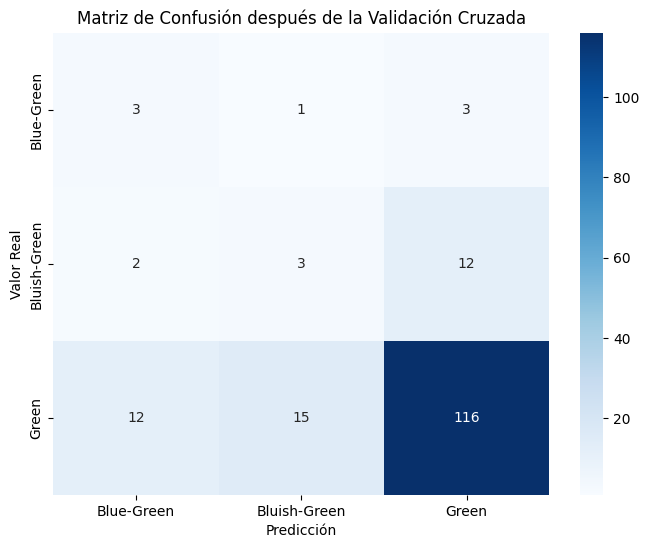

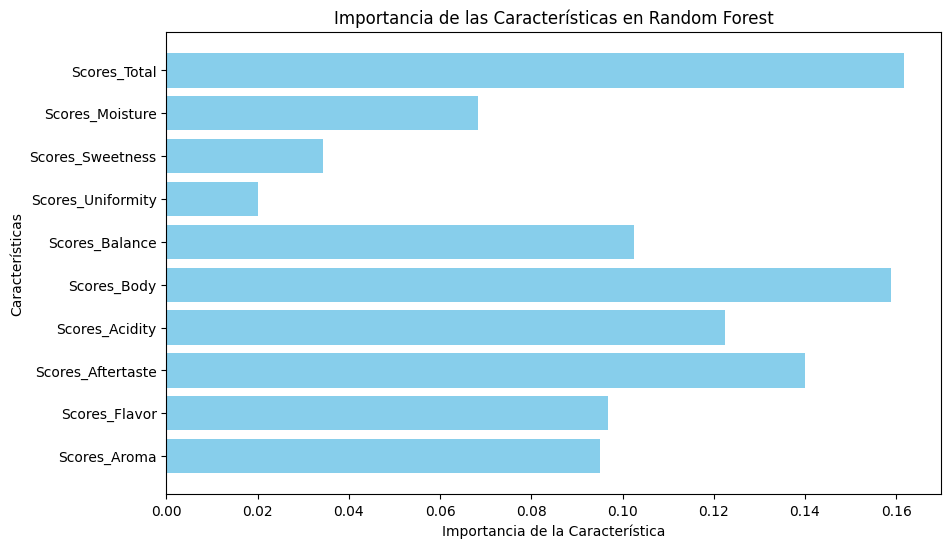

In [103]:
# Obtener el informe de clasificación
report_cv = classification_report(y_test, y_pred_cv_rf)
print('Informe de Clasificación después de la Validación Cruzada:')
print(report_cv)

# Matriz de confusión
conf_matrix_cv = confusion_matrix(y_test, y_pred_cv_rf)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

# Obtener importancia de las características
feature_importances = best_rf_classifier.feature_importances_

# Obtener nombres de las características
feature_names = X_train.columns

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Importancia de la Característica')
plt.ylabel('Características')
plt.title('Importancia de las Características en Random Forest')
plt.show()

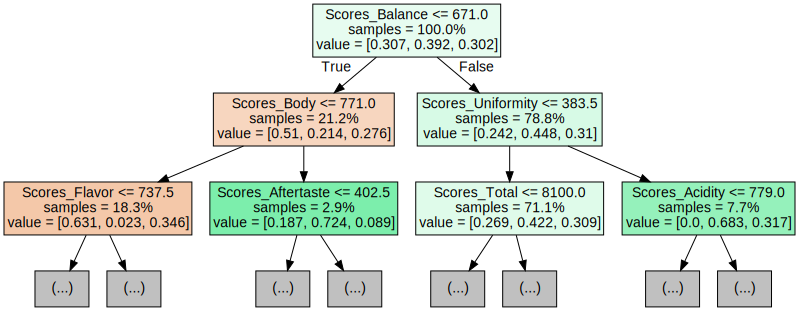

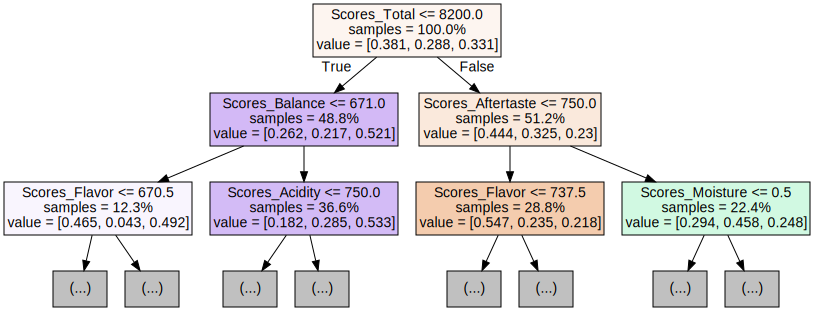

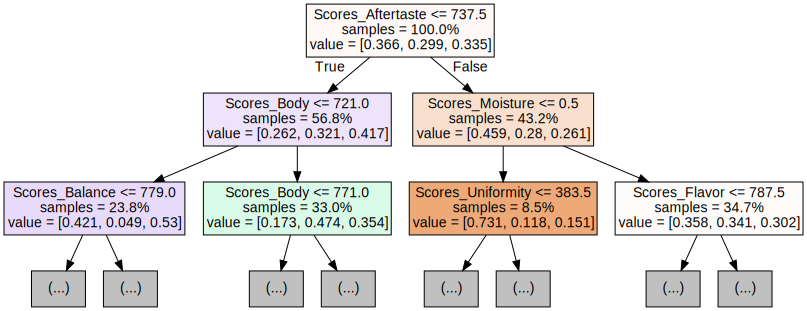

In [108]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import display
import graphviz

# Export the first three decision trees from the forest
for i in range(3):
  tree = best_rf_classifier.estimators_[i]
  dot_data = export_graphviz(tree,
                              feature_names=X_train.columns,
                              filled=True, max_depth=2, impurity=False,
                              proportion=True)
  graph = graphviz.Source(dot_data)
  display(graph)